In [74]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
from scipy.optimize import curve_fit

In [75]:
gradini = np.array([525,575,525,262.5,512.5,575,500,687.5,487.5,562.5,475,312.5,462.5,562.5,475])*1e-3

In [76]:
gradini.mean()

0.49999999999999994

In [77]:
np.sqrt(gradini.std(ddof=1)**2 + (0.0125**2)/12)

0.1035727114042065

In [78]:
V_X = np.array([-0.56, -1.02, -1.53, -2.05, -2.24, -2.69, -3.28, -3.84, -4.6, -4.98, -5.5, -6.21, -6.5,  -6.98, -7.54, -8.03])
sigmaV = lambda a: 0.04*a+.05
sigmaVV = lambda a: 0.03*a
sigma_V_X = sigmaV(V_X)

In [97]:
def retta(x,m,c):
    return m*x+c
def conv(x, step):
    return (x*step+step)*(-1)

In [98]:
popt, cov = curve_fit(retta, range(16), V_X, sigma=sigma_V_X)

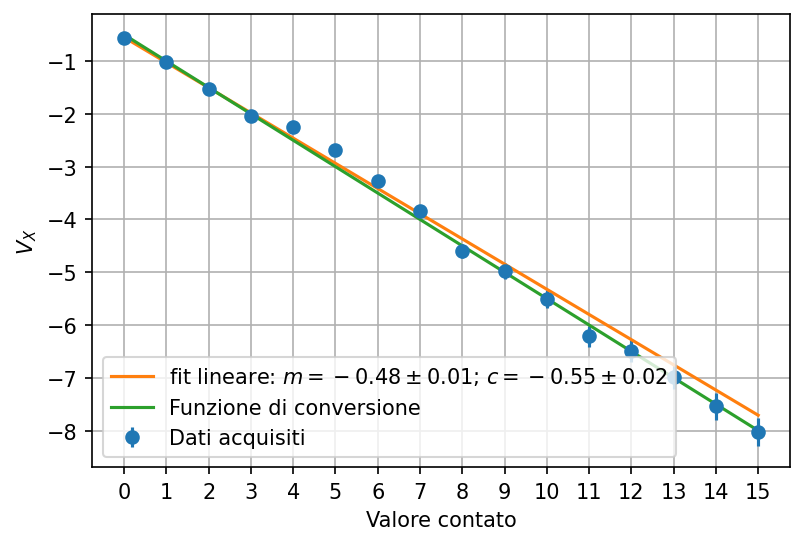

In [105]:
plt.errorbar(range(16), V_X, yerr=sigma_V_X, linestyle="", marker="o", label="Dati acquisiti")
plt.plot(range(16), retta(range(16), popt[0], popt[1]), label="fit lineare: $m={}\pm{}$; $c={}\pm{}$".format(popt[0].round(2), (cov[0][0]**.5).round(2), popt[1].round(2), (cov[1][1]**.5).round(2)))
plt.plot(range(16), conv(range(16), gradini.mean()), label="Funzione di conversione")
plt.xticks(range(16))
plt.grid()
plt.xlabel("Valore contato")
plt.ylabel("$V_X$")
plt.legend()
plt.savefig("conv.png", dpi=300)

In [80]:
def tabmaker(l):
    st = ""
    for i in range(len(l[0][1])):
        for j in range(len(l)):
            col = l[j]
            #print(col)
            st+="${}\pm{}$ & ".format(np.round(col[1][i], 4), np.round(col[0](col[1][i]), 2))
        st += " \\\ "
    return st


In [81]:
print(tabmaker([(sigmaVV, gradini*10**3)]))

$525.0\pm15.75$ &  \\ $575.0\pm17.25$ &  \\ $525.0\pm15.75$ &  \\ $262.5\pm7.88$ &  \\ $512.5\pm15.38$ &  \\ $575.0\pm17.25$ &  \\ $500.0\pm15.0$ &  \\ $687.5\pm20.62$ &  \\ $487.5\pm14.62$ &  \\ $562.5\pm16.88$ &  \\ $475.0\pm14.25$ &  \\ $312.5\pm9.38$ &  \\ $462.5\pm13.88$ &  \\ $562.5\pm16.88$ &  \\ $475.0\pm14.25$ &  \\ 
